# Todo

1. Import image
2. Set filters
3. Add filter to conv layer
4. Make a forward pass
5. Visualize

# Import and display image

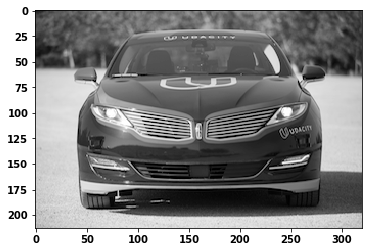

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("images/udacity_sdc.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray');

# Set filters 

(4, 4, 4)


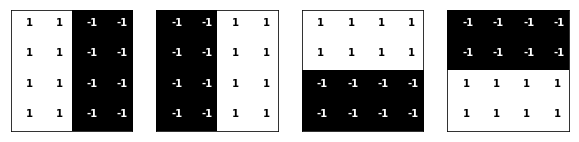

In [39]:
import numpy as np

filter_1 = np.tile(np.array([1, 1, -1, -1]), 4).reshape(4, 4)
# print(filter_1)
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3

filters = np.array([filter_1, filter_2, filter_3, filter_4])

def visualize_filters(filters):
    n = len(filters)
    fig, ax = plt.subplots(1, n, figsize=(10, 6))
    
    for i, fltr in enumerate(filters):
        ax[i].imshow(fltr, cmap='gray')
        
        nrows = fltr.shape[0]
        ncols = fltr.shape[1]
        
        for x in range(nrows):
            for y in range(ncols):
                val = fltr[x, y]
                ax[i].annotate(val, xy=(y, x), color= 'white' if val<0 else 'black')
                ax[i].set_xticks([])
                ax[i].set_yticks([])
                
print(filters.shape)
visualize_filters(filters)

# Set architecture and add weights to conv layer

In [108]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weights):
        super().__init__()
        
        kernel_x, kernel_y = weights.shape[2:]
        self.conv1 = nn.Conv2d(1, weights.shape[0], kernel_size=(kernel_x, kernel_y))
        
        # tensorify the weights to (no.of filters, input_channels, kernel_x, kernel_y)
        if len(weights.shape) == 3:
            weights = torch.from_numpy(weights).unsqueeze(1)
            
        self.conv1.weight = torch.nn.Parameter(weights)
        
    def forward(self, x):
        conv_x = self.conv1(x)
        activated_x = F.relu(conv_x)
        
        return conv_x, activated_x

# Make a forward pass

In [123]:
# change filters to tensor
tensor_filters = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

# forward pass
net = Net(tensor_filters)


tensor_image = torch.from_numpy(gray).view(1, 1, gray.shape[0], gray.shape[1]).type(torch.FloatTensor)
conv_x, activated_x = net.forward(tensor_image)

print(conv_x.shape)

torch.Size([1, 4, 210, 317])


In [146]:
def visualize_images(images, size=1):
    if type(images) == torch.Tensor:
        images = images.squeeze().data.numpy()
    
    h = 20 * size
    w = 20 * size
    fig, ax = plt.subplots(1, len(images), figsize=(h, h))
    
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        

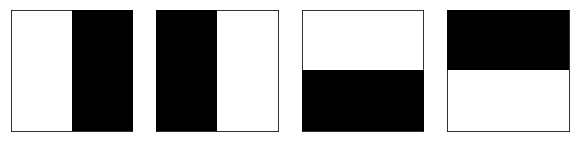

In [147]:
visualize_images(filters, size=0.5)

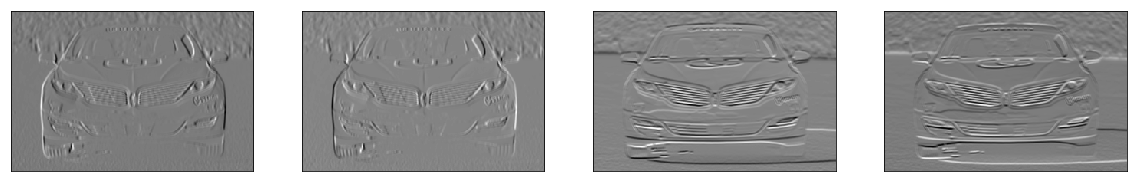

In [137]:
visualize_images(conv_x)

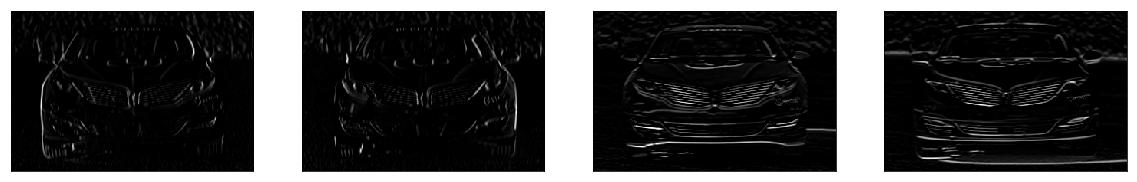

In [138]:
visualize_images(activated_x)